In [1]:
'''
【课程1.7】  相关性分析

分析连续变量之间的线性相关程度的强弱

图示初判 / Pearson相关系数（皮尔逊相关系数） / Sperman秩相关系数（斯皮尔曼相关系数）


'''

'\n【课程1.7】  相关性分析\n\n分析连续变量之间的线性相关程度的强弱\n\n图示初判 / Pearson相关系数（皮尔逊相关系数） / Sperman秩相关系数（斯皮尔曼相关系数）\n\n\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
% matplotlib inline

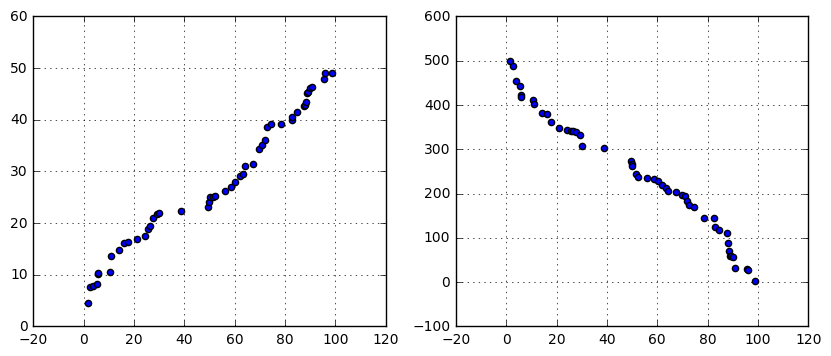

In [9]:
# 图示初判
# （1）变量之间的线性相关性

data1 = pd.Series(np.random.rand(50)*100).sort_values()
data2 = pd.Series(np.random.rand(50)*50).sort_values()
data3 = pd.Series(np.random.rand(50)*500).sort_values(ascending = False)
fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(data1,data2)
plt.grid()

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(data1,data3)
plt.grid()

,A,B,C,D
0,0.308606,0.641662,0.101278,0.690805
1,0.382610,0.696760,0.837253,0.591525
2,0.626200,0.543486,0.034343,0.603525
3,0.867588,0.213845,0.698960,0.693616
4,0.196363,0.136676,0.095213,0.321640


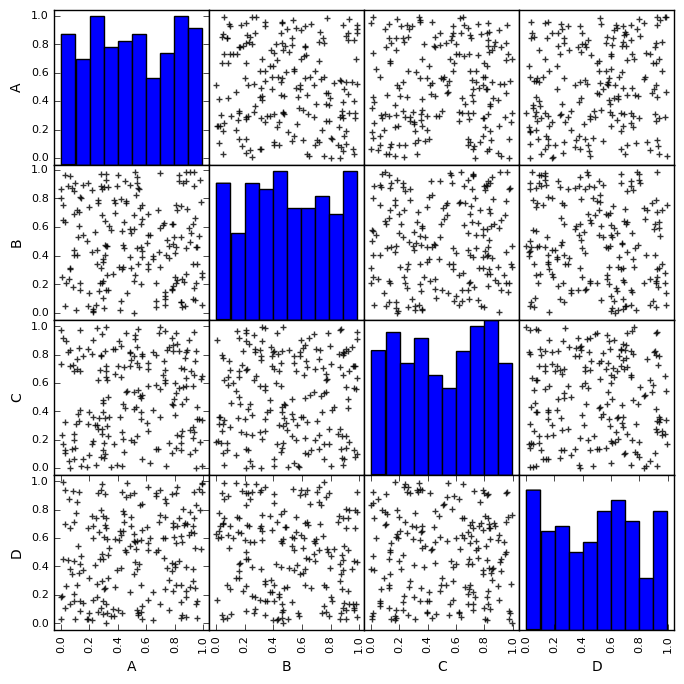

In [10]:
# 图示初判
# （2）散点图矩阵初判多变量间关系

data = pd.DataFrame(np.random.rand(200,4),columns = ['A','B','C','D'])
pd.scatter_matrix(data,figsize = (8,8),
                 c = 'k',
                 marker = '+',
                 diagonal = 'hist',
                 alpha = 0.8,
                 range_padding = 0.1)
data.head()

In [14]:
# Pearson相关系数
data1 = pd.Series(np.random.rand(50)*100).sort_values()
data2 = pd.Series(np.random.rand(50)*50).sort_values()
data = pd.DataFrame({'value1':data1.values,
                    'value2':data2.values})
print(data.head())
mean1,mean2 = data1.mean(),data2.mean()
std1,std2 = data1.std(),data2.std()
print('value1正态性检验：\n',stats.kstest(data['value1'], 'norm', (mean1, std1)))
print('value2正态性检验：\n',stats.kstest(data['value2'], 'norm', (mean2, std2)))
print('------')
# 正态性检验 → pvalue >0.05

data['(x-mean1)*(y-mean2)'] = (data['value1'] - mean1) * (data['value2'] - mean2)
data['(x-mean1)**2'] = (data['value1'] - mean1)**2
data['(y-mean2)**2'] = (data['value2'] - mean2)**2
print(data.head())
print('------')
# 制作Pearson相关系数求值表

r = data['(x-mean1)*(y-mean2)'].sum() / (np.sqrt(data['(x-mean1)**2'].sum() * data['(y-mean2)**2'].sum()))
print('Pearson相关系数为：%.4f' % r)
# 求出r
# |r| > 0.8 → 高度线性相关

      value1    value2
0   5.969305  0.552618
1   6.742846  0.695330
2   9.165514  0.812179
3   9.310219  6.105364
4  11.875638  7.875425
value1正态性检验：
 KstestResult(statistic=0.12245879075962129, pvalue=0.41204707804215257)
value2正态性检验：
 KstestResult(statistic=0.085442875606659696, pvalue=0.85871027163571578)
------
      value1    value2  (x-mean1)*(y-mean2)  (x-mean1)**2  (y-mean2)**2
0   5.969305  0.552618          1245.945416   2980.233652    520.892037
1   6.742846  0.695330          1220.610381   2896.374539    514.398149
2   9.165514  0.812179          1159.657955   2641.477677    509.111466
3   9.310219  6.105364           885.113968   2626.624273    298.263723
4  11.875638  7.875425           754.632645   2370.247158    240.257826
------
Pearson相关系数为：0.9700


In [16]:
# Pearson相关系数 - 算法

data1 = pd.Series(np.random.rand(100)*100).sort_values()
data2 = pd.Series(np.random.rand(100)*50).sort_values()
data = pd.DataFrame({'value1':data1.values,
                     'value2':data2.values})
print(data.head())
print('------')
# 创建样本数据

data.corr()
# pandas相关性方法：data.corr(method='pearson', min_periods=1) → 直接给出数据字段的相关系数矩阵
# method默认pearson

     value1    value2
0  0.566005  0.735195
1  1.915274  0.937285
2  2.758505  2.225403
3  3.813356  2.301511
4  3.979252  2.512621
------


,value1,value2
value1,1.000000,0.995472
value2,0.995472,1.000000


In [17]:
# Sperman秩相关系数

data = pd.DataFrame({'智商':[106,86,100,101,99,103,97,113,112,110],
                    '每周看电视小时数':[7,0,27,50,28,29,20,12,6,17]})
print(data)
print('------')
# 创建样本数据

data.sort_values('智商', inplace=True)
data['range1'] = np.arange(1,len(data)+1)
data.sort_values('每周看电视小时数', inplace=True)
data['range2'] = np.arange(1,len(data)+1)
print(data)
print('------')
# “智商”、“每周看电视小时数”重新按照从小到大排序，并设定秩次index

data['d'] = data['range1'] - data['range2']
data['d2'] = data['d']**2
print(data)
print('------')
# 求出di，di2

n = len(data)
rs = 1 - 6 * (data['d2'].sum()) / (n * (n**2 - 1))
print('Pearson相关系数为：%.4f' % rs)
# 求出rs

    智商  每周看电视小时数
0  106         7
1   86         0
2  100        27
3  101        50
4   99        28
5  103        29
6   97        20
7  113        12
8  112         6
9  110        17
------
    智商  每周看电视小时数  range1  range2
1   86         0       1       1
8  112         6       9       2
0  106         7       7       3
7  113        12      10       4
9  110        17       8       5
6   97        20       2       6
2  100        27       4       7
4   99        28       3       8
5  103        29       6       9
3  101        50       5      10
------
    智商  每周看电视小时数  range1  range2  d  d2
1   86         0       1       1  0   0
8  112         6       9       2  7  49
0  106         7       7       3  4  16
7  113        12      10       4  6  36
9  110        17       8       5  3   9
6   97        20       2       6 -4  16
2  100        27       4       7 -3   9
4   99        28       3       8 -5  25
5  103        29       6       9 -3   9
3  101        50       5      10 -5 

In [18]:
# Pearson相关系数 - 算法

data = pd.DataFrame({'智商':[106,86,100,101,99,103,97,113,112,110],
                    '每周看电视小时数':[7,0,27,50,28,29,20,12,6,17]})
print(data)
print('------')
# 创建样本数据

data.corr(method='spearman')
# pandas相关性方法：data.corr(method='pearson', min_periods=1) → 直接给出数据字段的相关系数矩阵
# method默认pearson

    智商  每周看电视小时数
0  106         7
1   86         0
2  100        27
3  101        50
4   99        28
5  103        29
6   97        20
7  113        12
8  112         6
9  110        17
------


,智商,每周看电视小时数
智商,1.000000,-0.175758
每周看电视小时数,-0.175758,1.000000
